In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib notebook

In [26]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

#  Old Z

In [27]:
phi_vec=(np.pi/6)*np.linspace(0,1,7)
phi_names=['0', r'$\pi/36$', r'$\pi/18$', r'$\pi/12$', r'$\pi/9$', r'$5\pi/36$', r'$\pi/6$']
hx_vec = np.linspace(0.10, 0.60, 6)
sizes = [2,3,4,5,6]
Jzz = 1.0
hz = 0.9
time_set = np.power(2, np.arange(40))

Z=np.empty((len(phi_vec), len(hx_vec), len(sizes)), dtype=np.dtype((np.complex128, (len(time_set),))))

for phinum, phi in enumerate(phi_vec):
    for hxnum, hx in enumerate(hx_vec):
        for L in sizes:
            filename='clock3/Z_D/scan_1/Z/Z_%02d_%02d_%02d.dat' % (phinum, hxnum, L)
            t, Zabs, Zang, thist = np.loadtxt(filename, unpack=True)
            Z[phinum, hxnum, L-2]=Zabs*np.exp(1j*Zang)

<IPython.core.display.Javascript object>


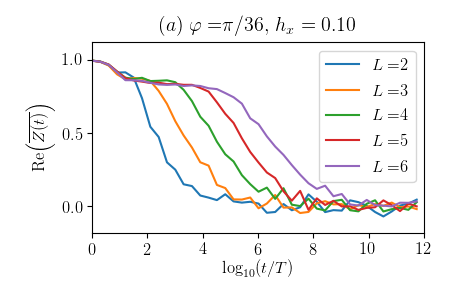

<IPython.core.display.Javascript object>


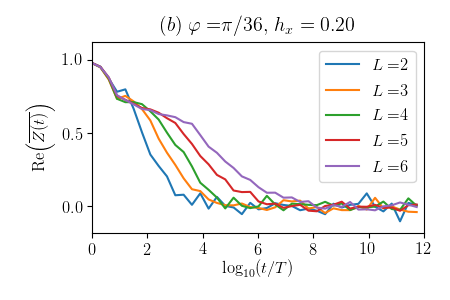

<IPython.core.display.Javascript object>


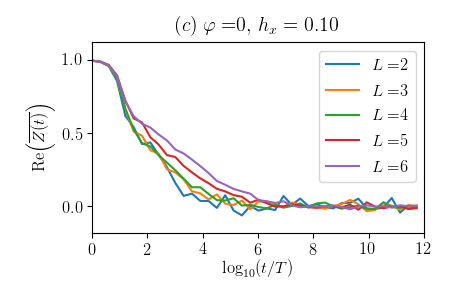

In [32]:
myplots=[(1,0,'a'), (1,1,'b'), (0,0,'c')]

for phinum, hxnum, character in myplots:
    figZ, axZ = plt.subplots(1,figsize=(4.5,3))
    for L in sizes:
        axZ.plot(np.log10(time_set), np.real(Z[phinum, hxnum, L-2]), label=r'$L=$%d' %L)

    axZ.set_ylim(-0.18,1.12)
    axZ.set_xlim(0,12)
    axZ.set_ylabel(r'Re$\left(\overline{Z(t)}\right)$')
    axZ.set_xlabel(r'$\log_{10} (t/T)$')
    axZ.legend()
    axZ.set_title(r'$(%c) \;\varphi=$' %character +phi_names[phinum]+', $h_x=%.2f$' %hx_vec[hxnum])
    plt.tight_layout()
    plt.savefig('Z2%c.pdf' %character, bbox_inches='tight', pad_inches=0.02)
plt.show()

<IPython.core.display.Javascript object>


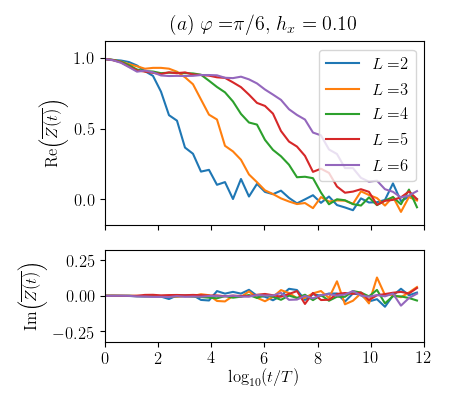

<IPython.core.display.Javascript object>


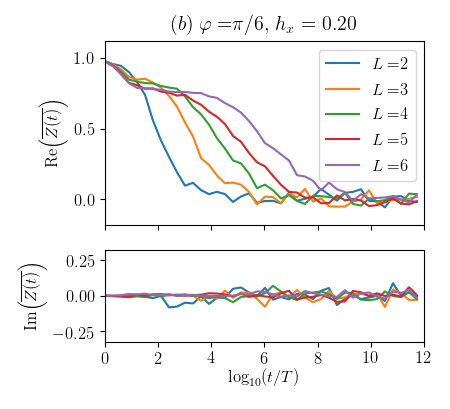

<IPython.core.display.Javascript object>


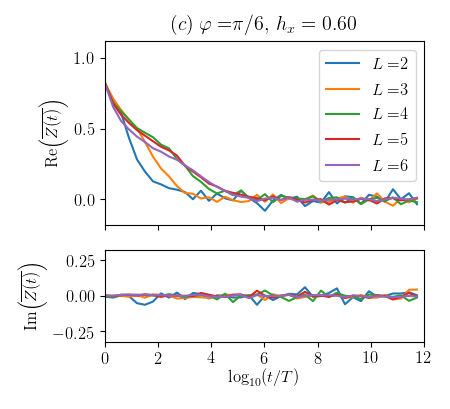

In [33]:
myplots=[(6,0,'a'), (6,1,'b'), (6,5,'c')]

for phinum, hxnum, character in myplots:
    figZ, axZ = plt.subplots(2,figsize=(4.5,4.1), gridspec_kw={'height_ratios':[2, 1]}, sharex=True)
    for L in sizes:
        axZ[0].plot(np.log10(time_set), np.real(Z[phinum, hxnum, L-2]), label=r'$L=$%d' %L)
        axZ[1].plot(np.log10(time_set), np.imag(Z[phinum, hxnum, L-2]), label=r'$L=$%d' %L)

    axZ[0].set_xlim(0,12)
    axZ[0].set_ylim(-0.18,1.12)
    axZ[1].set_ylim(-0.325, 0.325)
    axZ[0].set_ylabel(r'Re$\left(\overline{Z(t)}\right)$')
    axZ[1].set_ylabel(r'Im$\left(\overline{Z(t)}\right)$')
    axZ[1].set_xlabel(r'$\log_{10} (t/T)$')
    axZ[0].legend()
    axZ[0].set_title(r'$(%c)\; \varphi=$' %character +phi_names[phinum]+', $h_x=%.2f$' %hx_vec[hxnum])
    plt.tight_layout()
    plt.savefig('Z1%c.pdf' %character, bbox_inches='tight', pad_inches=0.02)
plt.show()

def update(phinum=widgets.IntSlider(min=0,max=len(phi_vec)-1,description=r'$\varphi$'),\
          hxnum=widgets.IntSlider(min=0,max=len(hx_vec)-1,description=r'$h_x$')):
    for L in sizes:
        axZ[0].lines[L-2].set_ydata(np.real(Z[phinum, hxnum, L-2]))
        axZ[1].lines[L-2].set_ydata(np.imag(Z[phinum, hxnum, L-2]))
    axZ[0].set_title(r'$\varphi=$'+phi_names[phinum]+', $h_x=%.2f$' %(hx_vec[hxnum]))
    figZ.canvas.draw()    

In [53]:
interact(update);

interactive(children=(IntSlider(value=0, description='$\\varphi$', max=6), IntSlider(value=0, description='$h_…

# Old D

In [35]:
D=np.empty((len(phi_vec), len(hx_vec)), dtype=np.dtype((np.float64, (len(sizes),))))

for phinum, phi in enumerate(phi_vec):
    for hxnum, hx in enumerate(hx_vec):
        filename='clock3/Z_D/scan_1/Delta/D_%02d_%02d.dat' % (phinum, hxnum)
        Ninv, Delta_0, Delta_2pik, r, log_Delta_0, log_Delta_2pik = np.loadtxt(filename, unpack=True)
        D[phinum, hxnum]=Delta_2pik/Delta_0

<IPython.core.display.Javascript object>


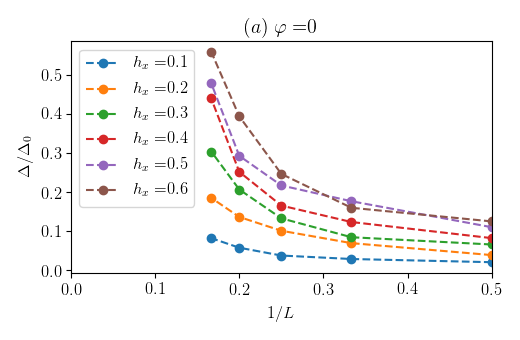

<IPython.core.display.Javascript object>


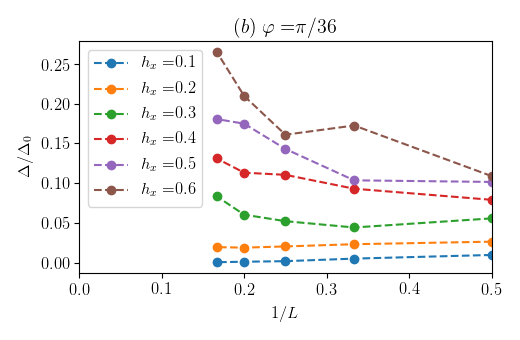

In [36]:
myplots=[(0,'a'), (1, 'b')]

for phinum, character in myplots:
    figD, axD = plt.subplots(1,figsize=(5.2,3.4))
    for hxnum, hx in enumerate(hx_vec):
        axD.plot(1/np.array(sizes), D[phinum, hxnum], label=r'$h_x=$%.1f' %hx, marker='o', linestyle='dashed')

    axD.set_xlim(0,0.5)
    axD.set_ylabel(r'$\Delta/\Delta_0$')
    axD.set_xlabel(r'$1/L$')
    axD.legend(loc='upper left')
    axD.set_title(r'$(%c)\;\varphi=$' %character +phi_names[phinum])
    plt.tight_layout()
    plt.savefig('DN%d.pdf'%phinum, bbox_inches='tight', pad_inches=0.02)
plt.show()

def update(phinum=widgets.IntSlider(min=0,max=len(phi_vec)-1,description=r'$\varphi$')):
    for hxnum, hx in enumerate(hx_vec):
        axD.lines[hxnum].set_ydata(D[phinum, hxnum])

    axD.set_title(r'$\varphi=$'+phi_names[phinum])
    figD.canvas.draw()    

In [71]:
interact(update);

interactive(children=(IntSlider(value=0, description='$\\varphi$', max=6), Output()), _dom_classes=('widget-in…

# Old spectral results

In [2]:
# sizes = [2,3,4,5]
# dim_loc = 3
# n_dis = 100
# Jzz = 1.0

# phi_vec = [\
#     (np.pi/6)*np.linspace(0,1,7),\
#     (np.pi/36)*np.linspace(0,1,7, endpoint=False)[1:],\
#     (np.pi/6)*np.linspace(0,1,7),\
#     (np.pi/6)*np.linspace(0,1,7),\
#     (np.pi/36)*np.linspace(0,1,7, endpoint=False)[1:-1],\
#     -(np.pi/6)*np.linspace(0,1,7),\
#     -(np.pi/36)*np.linspace(0,1,7, endpoint=False)[:-1],\
#     np.array([-np.pi/648, np.pi/648]),\
#     -(np.pi/6)*np.linspace(0,1,7),\
#     -(np.pi/36)*np.linspace(0,1,7, endpoint=False)[:-1]]

# hz_vec=[0.9,0.9,0.9,0.3, 0.3,0.9,0.9, 0.9,0.3, 0.3]

In [37]:
hz10=9

In [38]:
newphi=np.concatenate((-(np.pi/6)*np.linspace(1,0,7)[:-1], -(np.pi/36)*np.linspace(1,0,7, endpoint=False)[1:],\
                      np.array([-np.pi/648,0, np.pi/648]), (np.pi/36)*np.linspace(0,1,7, endpoint=False)[1:],\
                      (np.pi/6)*np.linspace(0,1,7)[1:]))
newphinames=[r'$-\pi/6$',r'$-5\pi/36$', r'$-\pi/9$', r'$-\pi/12$', r'$-\pi/18$', r'$-\pi/36$',\
             r'$-\pi/42$', r'$-5\pi/252$', r'$-\pi/63$', r'$-\pi/84$', r'$-\pi/126$', r'$-\pi/252$',
             r'$-\pi/648$', r'$0$',r'$\pi/648$', r'$\pi/252$', r'$\pi/126$', r'$\pi/84$', r'$\pi/63$',
             r'$5\pi/252$', r'$\pi/42$', r'$\pi/36$', r'$\pi/18$', r'$\pi/12$', r'$\pi/9$', r'$5\pi/36$',
             r'$\pi/6$']

In [39]:
for i in range(len(newphi)): print(i, np.exp(1j*newphi[i]), newphi[i])

0 (0.8660254037844387-0.49999999999999994j) -0.5235987755982988
1 (0.9063077870366499-0.42261826174069944j) -0.4363323129985824
2 (0.9396926207859084-0.3420201433256687j) -0.3490658503988659
3 (0.9659258262890683-0.25881904510252074j) -0.2617993877991494
4 (0.984807753012208-0.17364817766693033j) -0.17453292519943295
5 (0.9961946980917455-0.0871557427476582j) -0.0872664625997165
6 (0.9972037971811801-0.07473009358642425j) -0.07479982508547127
7 (0.9980579158045318-0.06229283024485209j) -0.06233318757122605
8 (0.9987569212189223-0.049845885660697156j) -0.04986655005698084
9 (0.9993007047883985-0.037391194276325625j) -0.037399912542735635
10 (0.9996891820008162-0.024930691738072882j) -0.02493327502849043
11 (0.9999222924809749-0.01246631459541504j) -0.012466637514245215
12 (0.9999882478077495-0.004848117819001859j) -0.0048481368110953596
13 (1+0j) 0.0
14 (0.9999882478077495+0.004848117819001859j) 0.0048481368110953596
15 (0.9999222924809749+0.012466314595415034j) 0.01246663751424521
16 (

In [40]:
# for scan in range(1,11):
#     for phinum in range(len(phi_vec[scan-1])):
#         for L in sizes:
#             try:
#                 vec=np.loadtxt('logDelta/scan_%d/logDelta_%02d_%02d.dat' %(scan, phinum, L), unpack=False)
#                 phi=phi_vec[scan-1][phinum]
#                 phiindex=np.searchsorted([round(val, 8) for val in newphi], round(phi,8))
#                 print(phi, newphi[phiindex], phiindex, L, hz_vec[scan-1], scan)
#                 head= 'L %d\nphi %.4f\nhz 0.3\n hx\tDelta_0\tDelta_2pik\tr\tlog_Delta_0\tlog_Delta_2pik'\
#                 %(L,phi)
#                 if hz_vec[scan-1]==0.3:
#                     #print(vec)
#                     filename='clock3spec/hz03/gaps_%02d_%d' %(phiindex, L)
#                     with open(filename, 'ab') as f:
#                         np.savetxt(f, vec, header=head)
#             except: pass

In [41]:
sizes=[2,3,4,5]

<IPython.core.display.Javascript object>


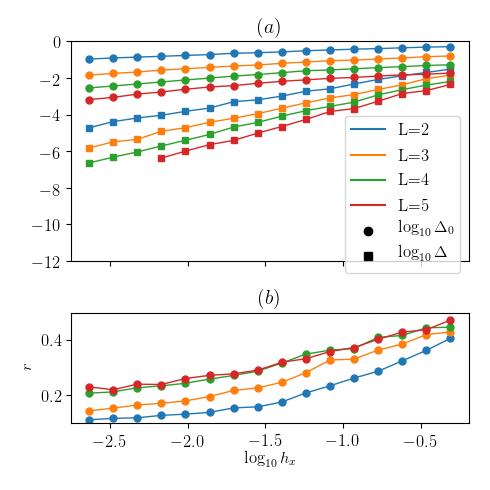

<IPython.core.display.Javascript object>


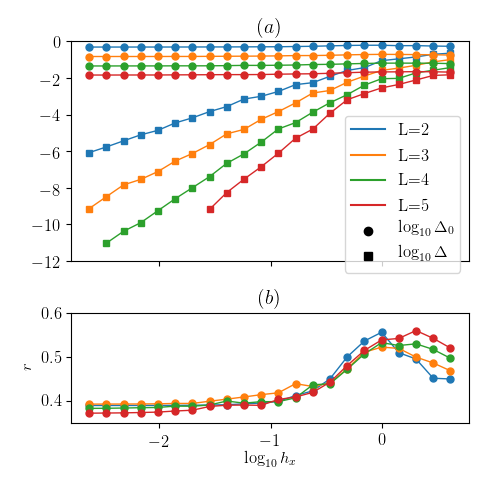

In [52]:
myplots=[(13,(0.1,0.5)), (22,(0.35,0.6))]

for phicount, yrange in myplots:
    figspec, axspec = plt.subplots(2,figsize=(4.9,4.9), gridspec_kw={'height_ratios':[2, 1]}, sharex=True)

    symbols = []
    labels = []

    for L in sizes:
        C='C%d' %(L-2)
        filename='clock3spec/hz0%d/gaps_%02d_%d' %(hz10, phicount, L)
        hx, Delta_0, Delta_2pik, r, log_Delta_0, log_Delta_2pik=np.loadtxt(filename, unpack=True)
        axspec[0].plot(np.log10(hx), log_Delta_0, marker='o', markersize=5, linestyle='-', linewidth=1, color=C)
        axspec[0].plot(np.log10(hx), log_Delta_2pik, marker='s', markersize=5, linestyle='-', linewidth=1, color=C)
        axspec[1].plot(np.log10(hx), r, marker='o', markersize=5, linestyle='-', linewidth=1, color=C)

        symbols.append(plt.Line2D((0,1),(0,0), color=C))
        labels.append('L=%d' %L)


    symbols.append(plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle=''))
    symbols.append(plt.Line2D((0,1),(0,0), color='k', marker='s', linestyle=''))
    labels.append(r'$\log_{10}\Delta_0$')
    labels.append(r'$\log_{10}\Delta$')
    legend=axspec[0].legend(symbols, labels, numpoints=1, bbox_to_anchor=(1,0.7))

    axspec[1].set_xlabel(r'$\log_{10} h_x$')
    axspec[1].set_ylabel(r'$r$')
    axspec[0].set_ylim(-12, 0)
    #axspec[1].set_ylim(0.35,0.6)
    #axspec[1].set_ylim(0.1,0.5)
    axspec[1].set_ylim(*yrange)
    #axspec[0].set_title(r'$\varphi=$'+newphinames[phicount])
    axspec[0].set_title(r'$(a)$')
    axspec[1].set_title(r'$(b)$')

    plt.tight_layout()

    plt.savefig('Delta_r%d.pdf' %phicount, bbox_inches='tight', pad_inches=0.02)


plt.show()
    

In [53]:
from scipy.optimize import curve_fit

def line(x, a, b):
    return a * x + b

In [54]:
#phicount=0
cutoff =-1.28

#figfit, axfit = plt.subplots(1,figsize=(6,4))


fit_res=[]

for phicount in range(len(newphi)):
    val_list=[]
    L_list=[]
    try:
        for L in sizes:
            C='C%d' %(L-2)
            filename='clock3spec/hz0%d/gaps_%02d_%d' %(hz10, phicount, L)
            hx, Delta_0, Delta_2pik, r, log_Delta_0, log_Delta_2pik=np.loadtxt(filename, unpack=True)
            loghx=np.log10(hx)
            #axfit.plot(loghx, log_Delta_2pik-log_Delta_0, marker='o', linestyle='', color=C, label='L=%d' %L)
            value=log_Delta_2pik-log_Delta_0-L*loghx
            cond=np.where(np.all([loghx<cutoff, log_Delta_2pik != -np.inf], axis=0))
            if len(cond)>0:
                val_list.append(np.mean(value[cond]))
                L_list.append(L)

        res = curve_fit(line, L_list, val_list)
        fit_res.append(res)
    except: fit_res.append(np.nan)


# for L in sizes:
#     axfit.plot(loghx, line(L, popt[0], popt[1])+ L*loghx,\
#          color='C%d' %(L-2), linestyle='dashed')
# axfit.legend()

# axfit.set_ylabel(r'$\log_{10} \Delta-\log_{10} \Delta_0$')
# axfit.set_xlabel(r'$\log_{10} h_x$')
# axfit.set_title(r'$\varphi=$'+newphinames[phicount])
 
    
# plt.tight_layout()


# plt.show()
    

/home/federica/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/federica/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


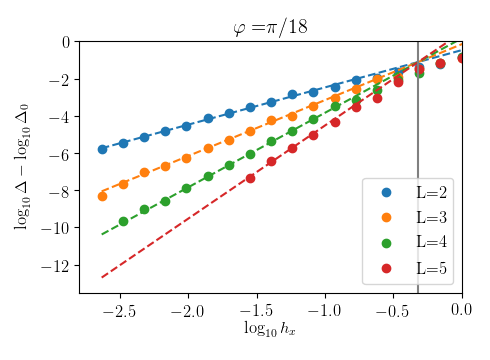

In [57]:



phicount=22
figfit, axfit = plt.subplots(1,figsize=(4.9,3.6))

for L in sizes:
    C='C%d' %(L-2)
    filename='clock3spec/hz0%d/gaps_%02d_%d' %(hz10, phicount, L)
    try:
        hx, Delta_0, Delta_2pik, r, log_Delta_0, log_Delta_2pik=np.loadtxt(filename, unpack=True)
        loghx=np.log10(hx)
        axfit.plot(loghx, log_Delta_2pik-log_Delta_0, marker='o', linestyle='', color=C, label='L=%d' %L)
    except:axfit.plot(np.nan, marker='o', linestyle='', color=C, label='L=%d' %L)
    try: axfit.plot(loghx, line(L, fit_res[phicount][0][0], fit_res[phicount][0][1])+ L*loghx,\
          color='C%d' %(L-2), linestyle='dashed')
    except: axfit.plot(np.nan,\
          color='C%d' %(L-2), linestyle='dashed')

axfit.axvline(x=-fit_res[phicount][0][0],  color='gray')
axfit.set_xlim(xmax=0)
axfit.set_ylim(ymax=0)
axfit.legend(loc='lower right')
axfit.set_ylabel(r'$\log_{10} \Delta-\log_{10} \Delta_0$')
axfit.set_xlabel(r'$\log_{10} h_x$')
axfit.set_title(r'$\varphi=$'+newphinames[phicount])
 
plt.tight_layout()
plt.savefig('fitDelta2.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

def update(phicount=widgets.IntSlider(min=0,max=len(newphi)-1,description='phase')):
    for L in sizes:
        C='C%d' %(L-2)
        filename='clock3spec/hz0%d/gaps_%02d_%d' %(hz10, phicount, L)
        try:
            hx, Delta_0, Delta_2pik, r, log_Delta_0, log_Delta_2pik=np.loadtxt(filename, unpack=True)
            loghx=np.log10(hx)
            #axfit.plot(loghx, log_Delta_2pik-log_Delta_0, marker='o', linestyle='', color=C, label='L=%d' %L)
            axfit.lines[2*(L-2)].set_data(loghx, log_Delta_2pik-log_Delta_0)
        except: axfit.lines[2*(L-2)].set_ydata(np.nan)
        try:
            axfit.lines[2*(L-2)+1].set_data(loghx, line(L, fit_res[phicount][0][0], fit_res[phicount][0][1])+ L*loghx)
        except: axfit.lines[2*(L-2)+1].set_ydata(np.nan)
        axfit.set_title(r'$\varphi=$'+newphinames[phicount])
    figfit.canvas.draw()    

In [301]:
interact(update);

interactive(children=(IntSlider(value=0, description='phase', max=26), Output()), _dom_classes=('widget-intera…

<IPython.core.display.Javascript object>


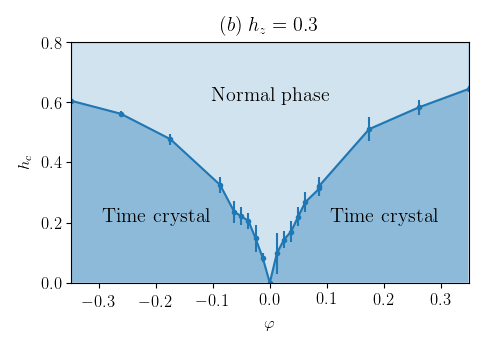

<IPython.core.display.Javascript object>


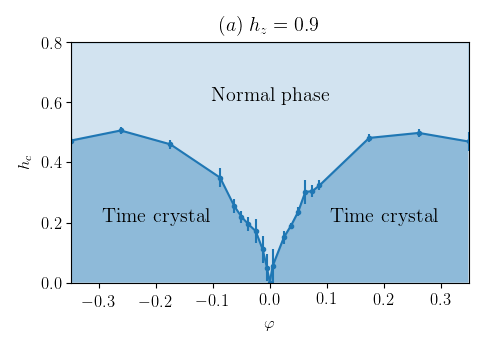

In [59]:
for hz10, character in [(3,'b'),(9,'a')]:
    figpd, axpd = plt.subplots(1,figsize=(4.9,3.5))

    # hc=np.full(len(newphi), np.nan)
    # dhc=np.full(len(newphi), np.nan)
    # for i in range(len(newphi)):
    #     try:
    #         hc[i]=10**(-fit_res[i][0][0])
    #         dhc=np.sqrt(fit_res[i][1][0][0])
    #     except: pass
    # x=np.array(newphi)[np.isfinite(hc)]
    # y=hc[np.isfinite(hc)]
    # yerr=dhc[np.isfinite(hc)]

    x, y, yerr = np.loadtxt('phasediagram/pd%d.dat' %hz10, unpack=True)


    axpd.errorbar(x,y, yerr=yerr, linestyle='-', marker='.')
    axpd.fill_between(x, 0, y, alpha=0.5)
    axpd.fill_between(x, y, 0.8, alpha=0.2, color='C0')
    axpd.set_ylim(0,0.8)
    axpd.set_xlim(-np.pi/9, np.pi/9)
    axpd.set_xlabel(r'$\varphi$')
    axpd.set_ylabel(r'$h_c$')
    axpd.text(0, 0.6, 'Normal phase', horizontalalignment='center', fontsize='large')
    axpd.text(-0.2, 0.2, 'Time crystal', horizontalalignment='center', fontsize='large')
    axpd.text(0.2, 0.2, 'Time crystal', horizontalalignment='center', fontsize='large')
    axpd.set_title(r'$(%c)\;h_z=0.%d$' %(character, hz10))
    #axpd.plot(newphi,np.abs(np.sin(3*newphi)))
    plt.tight_layout()
    plt.savefig('pd%d.pdf' %hz10, bbox_inches='tight', pad_inches=0.02)
plt.show()
#for i in zip(newphi, hc):print(i)

# Perturbed kick

<IPython.core.display.Javascript object>


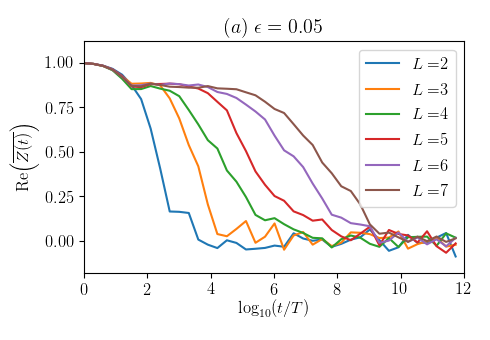

<IPython.core.display.Javascript object>


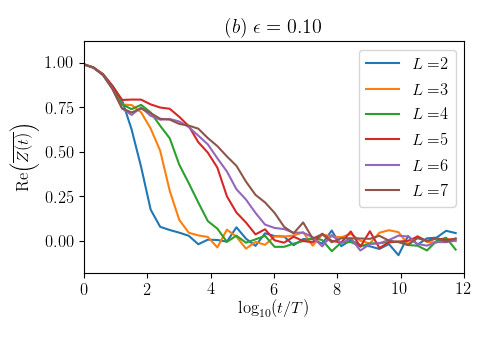

<IPython.core.display.Javascript object>


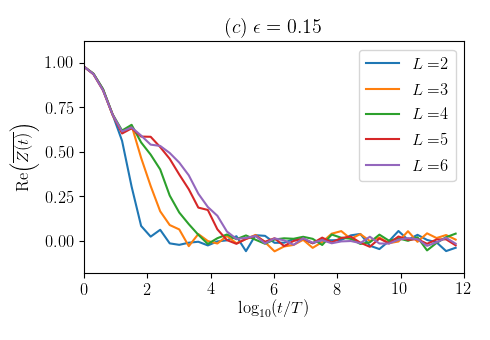

In [66]:
myplots=[(0.05,'a'), (0.1,'b'), (0.15,'c')]
sizes = [2,3,4,5,6,7]
time_set = np.power(2, np.arange(40))

Z=np.empty((len(phi_vec), len(hx_vec), len(sizes)), dtype=np.dtype((np.complex128, (len(time_set),))))

for i, plot in enumerate(myplots):
    figZ, axZ = plt.subplots(1,figsize=(4.9,3.4))
    eps, character= plot
    for L in sizes:
        try:
            filename='pertkick/Z_%02d_%02d.dat' % (i, L)
            t, Zre, Zim, varZ = np.loadtxt(filename, unpack=True)
            axZ.plot(np.log10(time_set), Zre, label=r'$L=$%d' %L)
        except:pass
    axZ.set_ylim(-0.18,1.12)
    axZ.set_xlim(0,12)
    axZ.set_ylabel(r'Re$\left(\overline{Z(t)}\right)$')
    axZ.set_xlabel(r'$\log_{10} (t/T)$')
    axZ.legend()
    axZ.set_title(r'$(%c) \;\epsilon=%.2f$' %(character,eps))
    plt.tight_layout()
    plt.savefig('Zeps%c.pdf' %character, bbox_inches='tight', pad_inches=0.02)
plt.show()